# Шаг 4. Аналитика средствами Python

## Оглавление
1. [План исследования](#step1)


2. [Описание данных](#step2)


3. [Исследование](#step3)
    
    3.1 [Шаг 1. Изучение и предобработка данных](#step4)
    
    3.2 [Шаг 1. Вывод](#step5)
    
    3.3 [Шаг 2. Выбор списка городов с наибольшим числом полётов](#step6)
    
    3.4 [Шаг 2. Вывод](#step7)
    
    3.5 [Шаг 3. Построение графиков](#step8)
    
    3.6 [Шаг 3. Вывод](#step9)
    
    
4. [Общие выводы](#step10)

## План исследования:  <a id="step1"></a> 

В данном проекте выполняется четвёртый шаг большого проекта "Аналитика в авиакомпании". Задачей всего проекта является выявление предпочтений пользователей, покупающих билеты на те или иные направления. Задачи четвёртого шага описаны ниже.

#### Для  двух наборов данных нужно:
1. импортировать файлы;
1. изучить данные в них;
1. проверить типы данных на корректность;
1. выбрать топ-10 городов по количеству рейсов;
1. построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
1. сделать выводы по каждому из графиков, пояснить результат.

## Описание данных:  <a id="step2"></a> 

#### База данных об авиаперевозках:
- Таблица airports — информация об аэропортах:
- airport_code — трёхбуквенный код аэропорта
- airport_name — название аэропорта
- city — город
- timezone — временная зона
- Таблица aircrafts — информация об самолётах:
- aircraft_code — код модели самолёта
- model — модель самолёта
- range — количество самолётов
- Таблица tickets — информация о билетах:
- ticket_no — уникальный номер билета
- passenger_id — персональный идентификатор пассажира
- passenger_name — имя и фамилия пассажира
- Таблица flights — информация о рейсах:
- flight_id — уникальный идентификатор рейса
- departure_airport — аэропорт вылета
- departure_time — дата и время вылета
- arrival_airport — аэропорт прилёта
- arrival_time — дата и время прилёта
- aircraft_code – id самолёта
- Таблица ticket_flights — стыковая таблица «рейсы-билеты»
- ticket_no — номер билета
- flight_id — идентификатор рейса
- Таблица festivals — информация о фестивалях
- festival_id — уникальный номер фестиваля
- festival_date — дата проведения фестиваля
- festival_city — город проведения фестиваля
- festival_name — название фестиваля


#### Файлы, в которых содержатся результаты запросов из предыдущих заданий:
/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года


## Исследование <a id="step3"></a> 

### Шаг 1. Изучение и предобработка данных  <a id="step4"></a> 

Выполним первые три пункта плана исследования, а имеено: импортируем файлы, изучим данные в них и проверим типы данных на корректность.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('/datasets/query_1.csv')
df_2 = pd.read_csv('/datasets/query_3.csv')

In [3]:
df_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В первом датасете содержится таблица из двух столбцов: модели самолёта model и количества полётов для каждой модели самолетов в сентябре 2018 года flights_amount. В таблице 8 строк. Типы данных должны быть строковый для model и целочисленный для flights_amount. Это подлежит проверке.

In [4]:
df_2

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Во втором датасете мы имеем таблицу также из двух столбцов, где в первом столбце city указан город, а во втором столбце - average_flights - среднее количество рейсов, прибывающих в город за день в августе 2018 года. В таблице 101 строка. Нужно проверить типы танных: city должен соответствовать строковому типу, а average_flights - целочисленному, поскольку это количество полётов (нельзя совершить "полполёта").

In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Мы видим, что в таблицах нет пропущенных значений. Проверим, нет ли в таблицах дубликатов. 
А также посмотрим на таблицы методом describe().

In [7]:
df_1.duplicated().sum()

0

In [8]:
df_2.duplicated().sum()

0

Видим, что дубликатов в обеих таблицах нет. С помощью метода describe() оценим, есть ли выбросы среди значений.

In [9]:
df_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Видим, что медиана и среднее значение сильно отличаются друг от друга, при этом нет точек, в три раза превышающих стандартное оклонение. Т.е. в таблице нет слишком отличающихся значений.

In [10]:
df_2.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Данные этой таблицы менее однородны: мы видим, что максимальное значение практически на порядок превышает стандартное отклонение. Распределение смещено влево и имеет большой хвост.

### Шаг 1. Вывод  <a id="step5"></a> 

Нами были изучены таблицы df_1 и df_2: таблицы не содержат пропусков, или дубликатов. Проверены типы данных: число полётов в первой таблице имеет целочисленный тип, а среднее число рейсов во второй таблице нужно заменить в следующем шаге с числа с плавающей точкой на целочисленный.

Распределения количества полётов по моделям самолётов и числа рейсов по городам неоднородны. Во второй таблице среднее значение близко по значению с третьей квантилью, т.е. расперделение сильно смещено влево.

### Шаг 2. Замена типов данных. Выбор списка городов с наибольшим числом полётов  <a id="step6"></a> 

В предыдущем шаге было установлено, что типы данных корректны в первой таблице, а во второй нужно сменить тип для average_flights с float на int. Кроме этого, в данном шаге нужно отобрать 10 городов, куда в августе 2018 года совершено больше всего перелётов. Это представляется логичным сделать перед округлением значений столбца average_flights (для замены типа данных на целочисленный нужно предварительно сделать математическое округление), поскольку округление может повлиять на очерёдность городов в рейтинге.

Посмотрим на топ-10 популярных направлений до округления и сохраним их в отдельный список.

In [11]:
df_2.sort_values(by = 'average_flights', ascending = False)[:10]

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Выберем топ-10 городов по количеству рейсов из датасета df_2:

In [12]:
top_10_cities = df_2.sort_values(by = 'average_flights', ascending = False)['city'][:10].tolist()
top_10_cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Красноярск',
 'Екатеринбург',
 'Ростов-на-Дону',
 'Пермь',
 'Брянск',
 'Сочи',
 'Ульяновск']

Логичным образом в списке топ-10 городов по количеству рейсов оказались две столицы на первом месте, а далее менее крупные города. Теперь произведём математическое округление методом round() и заменим тип данных в столбце average_flights:

In [13]:
#df_2['average_flights'] = df_2['average_flights'].astype('int')

In [14]:
df_2['average_flights'] = round(df_2['average_flights']).astype('int')

Посмотрим на рейтин полётов после округления:

In [15]:
df_2_top_10 = df_2.sort_values(by = 'average_flights', ascending = False)[:10]
df_2_top_10

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


Округление выполнено верно. Кроме того из-за округления города в рейтинге поменялись местами. Поэтому решение отобрать сначала топ-10, а затем произвести замену данных было верным. Проверим ещё раз типы данных в таблице:

In [16]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Теперь все типы данных в таблицах корректны.

### Шаг 2. Вывод  <a id="step7"></a> 

Нами была произведена замена типа данных столбца среднего количества перелётов в таблице df_2 на целочисленный. А также выделен список топ-10 самых популярных направлений для перелётов. На первом и втором месте в рейтинге находятся две столицы. Любопытно, что Сочи занимает в рейтинге предпоследнее место и является не столь популярным направлением, как Пермь и Брянск, хотя данные собраны в августе, т.е. в сезон отпусков.

### Шаг 3. Построение графиков  <a id="step8"></a> 

Построим графики: в первую очередь модели самолетов и количество рейсов.

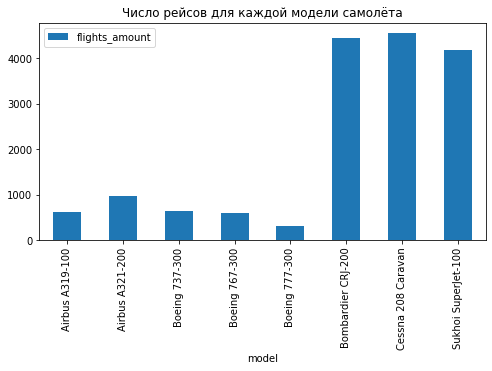

In [17]:
df_1.plot(x='model', y='flights_amount', title ='Число рейсов для каждой модели самолёта', kind='bar', figsize=(8, 4))
plt.show()

По графику видно, что большинство всех полётов совершается на трёх моделях самолётов: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100. Это более компактные самолёты по сравнению с другими моделями, т.е. подходящие для более коротких региональных перелётов. Также они отличаются меньшей пассажировместимостью. Логично, что лучше пустить три менее вместимых самолёта в неделю, например, из Москвы в Астрахань, чем один большой, но один раз в неделю. 

Далее построим график города и количество рейсов:

In [18]:
#plt.figure(figsize=(16, 10))
#plt.scatter('city', 'average_flights', 
#                data=df_2)
#plt.xticks(rotation=90)
#plt.title("Количество рейсов по городам за день в августе 2018 года")
#plt.gca().set(xlabel='City', ylabel='Average flights')

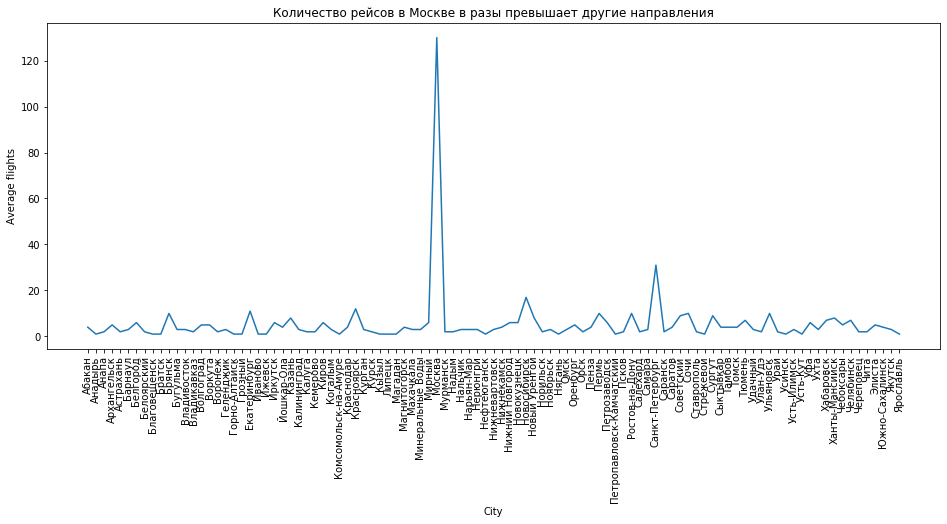

In [19]:
plt.figure(figsize=(16, 6))
plt.plot('city', 'average_flights', 
                data=df_2)
plt.xticks(rotation=90)
plt.title("Количество рейсов в Москве в разы превышает другие направления")
plt.gca().set(xlabel='City', ylabel='Average flights')
plt.show()

На графике видим два отчётливых пика: явный лидер по количеству рейсов - Москва, среди остальных городов на графике выделяется Санкт-Петербург. Также есть ещё несколько менее заметных пиков: Новокузнецк, Екатеринбург, Брянск и ещё несколько городов. Посмотрим более подробно график для топ-10 городов - лидеров по количеству перелётов.

In [20]:
#df_2.sort_values(by = 'average_flights', ascending = False)[:12]

In [21]:
#top_11_cities = df_2.sort_values(by = 'average_flights', ascending = False)['city'][:11].tolist()
#top_11_cities

In [22]:
#plt.figure(figsize=(8, 5))
#plt.scatter('city', 'average_flights', 
#                data=df_2_top_10)
#plt.xticks(rotation=90)
#plt.title("Количество рейсов по городам за день в августе 2018 года для топ-10 городов")
#plt.gca().set(xlabel='City', ylabel='Average flights')

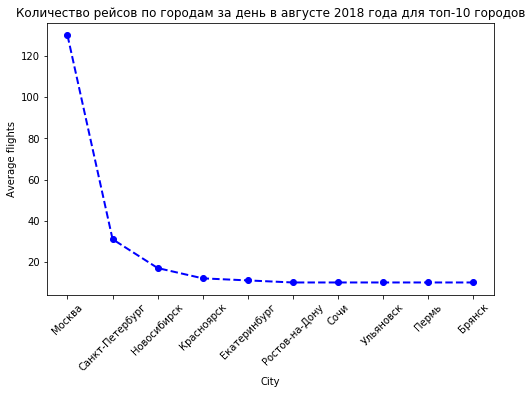

In [23]:
plt.figure(figsize=(8, 5))
plt.plot('city', 'average_flights','bo--', linewidth=2, markersize=6,
                data=df_2_top_10)
plt.xticks(rotation=45)
plt.title("Количество рейсов по городам за день в августе 2018 года для топ-10 городов")
plt.gca().set(xlabel='City', ylabel='Average flights')
plt.show()

На графике мы видим почти экспоненциальное затухание. Количество перелётов за один день в августе 2018 года для Москвы в среднем в 4 раза выше, чем для следующего в рейтинге городов Санкт-Петербурга.

### Шаг 3. Вывод  <a id="step9"></a> 

В шаге 3 были построены графики числа рейсов для каждой модели самолёта и распределение числа рейсов по городам за день в августе 2018 года. Графически выявлено, что три модели Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100  осуществляют большую часть рейсов.

Для исследования того, как распределено количество перелётов по городам, был построен сначала график по всему датасету. На нём выявлен значительный пик для Москвы, меньший пик для Санкт-Петербурга и ещё несколько слабопроявленных пиков. Для более тщательного изучения наиболее популярных направлений был построен также график для топ-10 направлений авиаперелётов, который продемонстрировал практически экспоненциальное затухание. 

## Общие выводы  <a id="step10"></a> 

Нами были изучены данные двух файлов, полученных на предыдущих этапах проекта. В результате первого запроса был получен датасет с информацией о моделях самолетов и количестве рейсов для каждой модели самолетов в сентябре 2018 года. Построив соответствующий график было выявлено, что превалирующее число полётов совершается на трёх моделях самолётов: Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100. Это модели, отличающиеся меньшим размером, и, соответственно, меньшей пассажировместимостью. Также они предназначены для более коротких региональных перелётов. Преимущество такого подхода заключается в том, что можно пустить больше рейсов, что более удобно для клиентов авиакомпаний.

В результате третьего запроса(предыдущего этапа проекта) была получена таблица с информацией о городах и среднем количестве рейсов, прибывающих в каждый город за день в августе 2018 года. Данная таблица была изучена, также в ней была произведена замена типа данных для среднего числа рейсов на целочисленный. Построив графики сначала для всех городов, а затем для топ-10 (топ 10 городов, куда совершалось больше всего полётов) было выявлено, что превалирующее число полётов совершалось в Москву. Причём число рейсов в другие города значительно отличается в меньшую сторону, больше, чем на порядок для всех городов, кроме Санкт-Петербурга. В свою очаредь в северную столицу - второй город по числу рейсов - совершалось приблизительно в четыре раза меньше перелётов, чем в Москву. Таким образом, однозначный вывод нашего исследования, что Москва - наиболее популярное направление для авиаперелётов.